# ML_SP22_Project_2 (Classical Machine Learning Model Building)

### Due Date: 5/2 23:59 pm


Name: **Jay Mistry**

EMPLID: **23859979**

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
from numpy import mean, absolute, sqrt
warnings.filterwarnings('ignore')
%matplotlib inline

In [59]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

In [60]:
# include your Project 1 Decision Tree Model as well
from DT_Jay_Mistry import DecisionTreeModel, accuracy_score

### Original dataset was based on
https://archive.ics.uci.edu/ml/datasets/wine+quality

Attribute Information:

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

### However, we will be using a slightly modified version of the dataset as follow

In [61]:
df = pd.read_csv("wine-tasting.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type,pHValue,taste
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,0.45,8.8,white,very acidic,normal
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,0.49,9.5,white,quite acidic,normal
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,0.44,10.1,white,quite acidic,normal
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,white,very acidic,normal
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,white,very acidic,normal


<AxesSubplot:xlabel='taste', ylabel='count'>

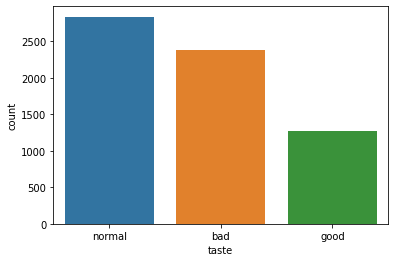

In [62]:
sns.countplot(x='taste',data=df)

<AxesSubplot:xlabel='taste', ylabel='count'>

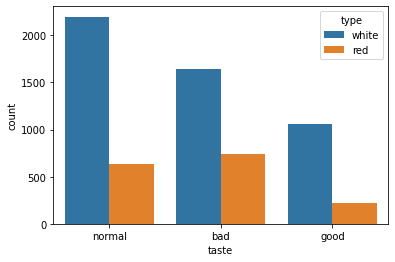

In [63]:
sns.countplot(x='taste', hue='type', data=df)

### Your task in this Project is to build the best predictive model to predict if a wine will be of good taste (ie we do not care if it is normal or bad taste, just good vs not good taste)

***You should follow the usual best practice in building models such as***

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least three (one of them is your own decision tree) models and checked their model performance
* performed cross-validations (f1-score)

***You should have also done the following***

* Try at least 3 models you have learned in class such as Logistic, Decision Tree, Random Forecast.
* Compare the sklearn Decision Tree with your own Decision Tree implementation results
* Include at least one ensemble models
* Identify out of all those you have tried, which one is the best model.

***And answer the following questions based on what you observe from your model building process***

* For the best fitted model, does it work better for the Red wine or White wine or similar
* Can ensemble methods improve your models?
* Whether the categorical variable pH Value is important or not. If it is important, and you need to make a prediction for one instance where the pH value is missing, how would you proceed?

In [64]:
#Number of rows and coloumns
df.shape

(6498, 13)

In [65]:
#Columns Names 
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'sulphates', 'alcohol', 'type', 'pHValue', 'taste'],
      dtype='object')

From the column names, Our target variable is 'taste'.

In [66]:
#The data types of the columns
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
sulphates               float64
alcohol                 float64
type                     object
pHValue                  object
taste                    object
dtype: object

In [67]:
#Finding the unique elements of the taste columns
df.taste.unique()

array(['normal', 'bad', 'good'], dtype=object)

In [68]:
#selection of values of colums taste
df = df[df['taste'].isin(['bad','good'])]

isin() method is used to filter data frames. isin() method helps in selecting rows with having a particular(or Multiple) value in a particular column

In [69]:
#After selection of the uniqued values
df['taste'].unique()

array(['bad', 'good'], dtype=object)

**Check for missing values**

In [70]:
#Checking for null values in the columns
df.isnull().sum()/len(df)

fixed acidity           0.000273
volatile acidity        0.000000
citric acid             0.000000
residual sugar          0.000000
chlorides               0.000000
free sulfur dioxide     0.000000
total sulfur dioxide    0.000000
density                 0.000000
sulphates               0.000000
alcohol                 0.000000
type                    0.000000
pHValue                 0.000000
taste                   0.000000
dtype: float64

In [71]:
#Removing the rows that contains null values.
df = df.dropna()

In [72]:
#After removing the null values from the rows
df.isnull().sum()/len(df)

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
sulphates               0.0
alcohol                 0.0
type                    0.0
pHValue                 0.0
taste                   0.0
dtype: float64

Therefore, there is no null value


In [73]:
#Checking the data types of each attribute.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3661 entries, 10 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3661 non-null   float64
 1   volatile acidity      3661 non-null   float64
 2   citric acid           3661 non-null   float64
 3   residual sugar        3661 non-null   float64
 4   chlorides             3661 non-null   float64
 5   free sulfur dioxide   3661 non-null   float64
 6   total sulfur dioxide  3661 non-null   float64
 7   density               3661 non-null   float64
 8   sulphates             3661 non-null   float64
 9   alcohol               3661 non-null   float64
 10  type                  3661 non-null   object 
 11  pHValue               3661 non-null   object 
 12  taste                 3661 non-null   object 
dtypes: float64(10), object(3)
memory usage: 400.4+ KB


**Detecting Outliers**

<AxesSubplot:xlabel='fixed acidity'>

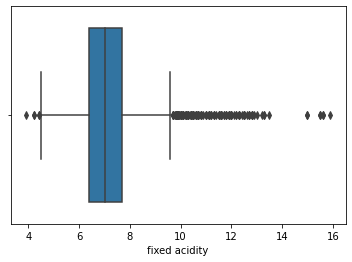

In [74]:
sns.boxplot(x = df['fixed acidity'])

<AxesSubplot:xlabel='volatile acidity'>

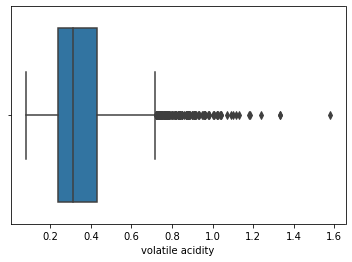

In [75]:
sns.boxplot(x = df['volatile acidity'])

<AxesSubplot:xlabel='citric acid'>

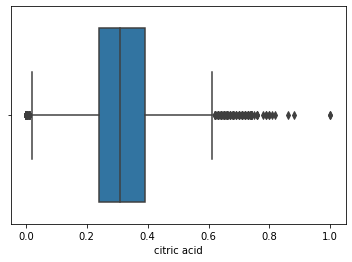

In [76]:
sns.boxplot(x = df['citric acid'])

<AxesSubplot:xlabel='residual sugar'>

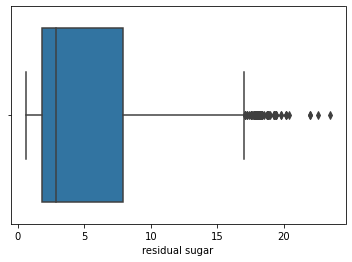

In [77]:
sns.boxplot(x = df['residual sugar'])

<AxesSubplot:xlabel='chlorides'>

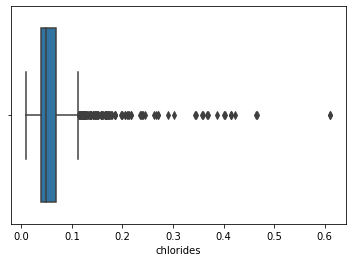

In [78]:
sns.boxplot(x = df['chlorides'])

<AxesSubplot:xlabel='free sulfur dioxide'>

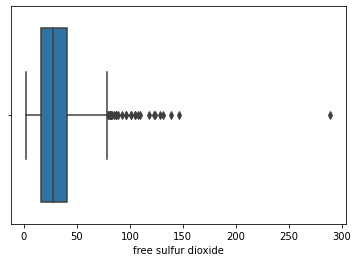

In [79]:
sns.boxplot(x = df['free sulfur dioxide'])

<AxesSubplot:xlabel='total sulfur dioxide'>

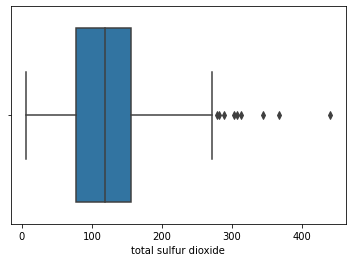

In [80]:
sns.boxplot(x = df['total sulfur dioxide'])

<AxesSubplot:xlabel='density'>

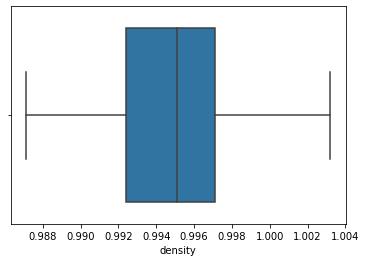

In [81]:
sns.boxplot(x = df['density'])

<AxesSubplot:xlabel='sulphates'>

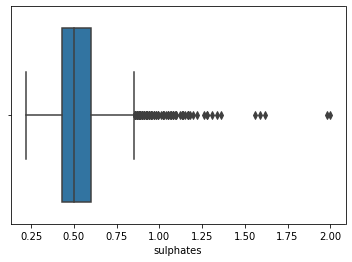

In [82]:
sns.boxplot(x = df['sulphates'])

<AxesSubplot:xlabel='alcohol'>

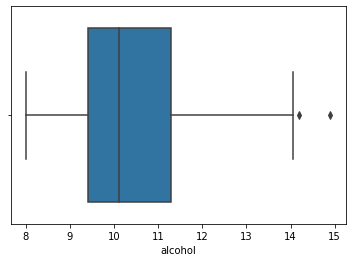

In [83]:
sns.boxplot(x = df['alcohol'])

fixed acidity              AxesSubplot(0.125,0.787927;0.227941x0.0920732)
volatile acidity        AxesSubplot(0.398529,0.787927;0.227941x0.0920732)
citric acid             AxesSubplot(0.672059,0.787927;0.227941x0.0920732)
residual sugar             AxesSubplot(0.125,0.677439;0.227941x0.0920732)
chlorides               AxesSubplot(0.398529,0.677439;0.227941x0.0920732)
free sulfur dioxide     AxesSubplot(0.672059,0.677439;0.227941x0.0920732)
total sulfur dioxide       AxesSubplot(0.125,0.566951;0.227941x0.0920732)
density                 AxesSubplot(0.398529,0.566951;0.227941x0.0920732)
sulphates               AxesSubplot(0.672059,0.566951;0.227941x0.0920732)
alcohol                    AxesSubplot(0.125,0.456463;0.227941x0.0920732)
dtype: object

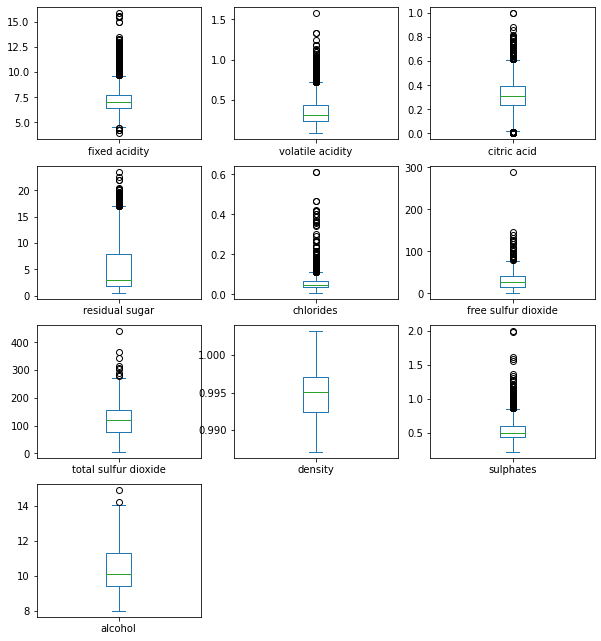

In [84]:
#Using box plot to check any outliers
df.plot(kind="box", subplots=True, layout=(7,3), figsize=(10,20))

Outliers detected in sulphates, total sulfur dioxie, free sulfur dioxide, residual sugar, chlorides, fixed acidity, volatile acidity and citric acid

**Removing Outlier**

In [85]:
#Selecting the numerical data 
df1 = df.select_dtypes(exclude = 'object')

In [86]:
#Removing outliers using Z-score method
z_scores = scipy.stats.zscore(df1)

#Calculating Z-scores of `df`
abs_z_scores = np.abs(z_scores)

#Filtered entries tells the index of the outliers
filtered_entries = (abs_z_scores < 2).all(axis = 1)
 
df = df[filtered_entries]  

In [87]:
df.shape

(2580, 13)

**Data Exploraion**

**Check data shape (Number of Rows & Columns)**

In [88]:
shape = df.shape
print('The row and columns are ', shape, 'respectively')

The row and columns are  (2580, 13) respectively


From the output, there are 2580 rows and 13 columns in the dataset. Out of the 13 columns, a target column is used as dependent variable for the EDA. The rest of the columns are mostly independent variables.

**Descriptive Statistics**

In [89]:
df.describe(include = 'all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type,pHValue,taste
count,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580,2580,2580
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,6,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white,very acidic,bad
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2094,1055,1629
mean,7.073585,0.324955,0.309341,4.854612,0.050626,29.550388,119.992248,0.994261,0.505488,10.434668,NaN,NaN,NaN
std,0.932097,0.134222,0.110984,3.868049,0.019788,15.284423,50.325984,0.002569,0.112804,1.118858,NaN,NaN,NaN
min,4.800000,0.080000,0.030000,0.600000,0.012000,2.000000,7.000000,0.988900,0.250000,8.400000,NaN,NaN,NaN
25%,6.400000,0.230000,0.250000,1.700000,0.037000,17.000000,89.000000,0.992120,0.420000,9.500000,NaN,NaN,NaN
50%,7.000000,0.290000,0.310000,2.900000,0.046000,29.000000,122.000000,0.994300,0.490000,10.300000,NaN,NaN,NaN
75%,7.600000,0.390000,0.370000,7.525000,0.058000,41.000000,155.000000,0.996280,0.580000,11.300000,NaN,NaN,NaN


**Check the location**

In [90]:
#Taste column data location if taste = good
taste1 = df.loc[df['taste'] == 'good']
taste1["taste"].head()

13    good
15    good
17    good
20    good
21    good
Name: taste, dtype: object

In [91]:
#Taste column data location if taste = bad
taste2 = df.loc[df['taste'] == 'bad']
taste2["taste"].head()

10    bad
11    bad
12    bad
19    bad
23    bad
Name: taste, dtype: object

**Graphical Representation**

(array([0, 1]), [Text(0, 0, 'bad'), Text(1, 0, 'good')])

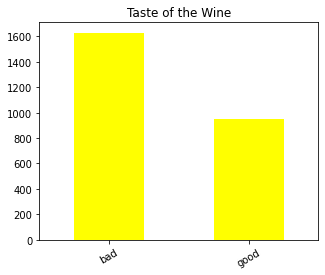

In [92]:
#Graph of Taste column
df['taste'].value_counts().plot(kind = 'bar', title = 'Taste of the Wine', figsize = (5,4), color = 'yellow')
plt.xticks(rotation = 30)

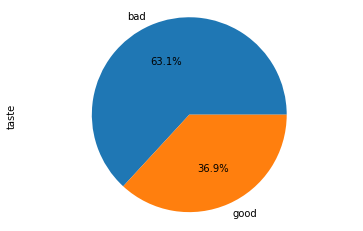

In [93]:
#Pie chart representation of Taste column
df["taste"].value_counts().plot(kind = "pie",autopct = "%1.1f%%")
plt.axis("equal")
plt.show()

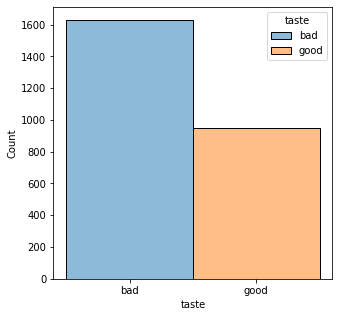

In [94]:
plt.figure(figsize = (5,5))
sns.histplot(x = 'taste', data = df, kde = True, hue = 'taste') 
plt.show()

**Separate the Data**
: Separated data set into training and testing

**Label encoding**

In [95]:
#LabelEncoder labels with a value between 0 and n_classes-1 where n is the number of distinct labels.
le = LabelEncoder()
df['taste'] = le.fit_transform(df['taste'])

In [96]:
#Drop the taste column
X = df.drop(columns = ['taste'])
y = df['taste'].values
y

array([0, 0, 0, ..., 1, 0, 0])

**One Hot Encoding**

In [97]:
#Dummies of the X
X = pd.get_dummies(X)

In [98]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type_red,type_white,pHValue_acidic,pHValue_extremly acidic,pHValue_lightly acidic,pHValue_midly acidic,pHValue_quite acidic,pHValue_very acidic
10,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.9908,0.56,12.0,0,1,0,1,0,0,0,0
11,8.6,0.23,0.40,4.20,0.035,17.0,109.0,0.9947,0.53,9.7,0,1,0,0,0,0,0,1
12,7.9,0.18,0.37,1.20,0.040,16.0,75.0,0.9920,0.63,10.8,0,1,0,0,0,0,0,1
13,6.6,0.16,0.40,1.50,0.044,48.0,143.0,0.9912,0.52,12.4,0,1,0,0,0,1,0,0
15,6.6,0.17,0.38,1.50,0.032,28.0,112.0,0.9914,0.55,11.4,0,1,0,0,0,0,1,0


Text(0.5, 1.0, 'Taste of the Wine (0=bad, 1=good)')

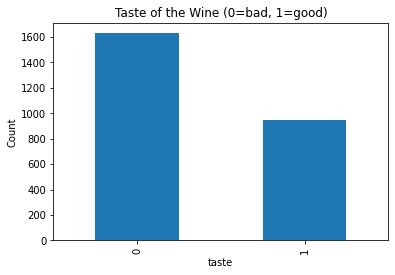

In [99]:
plt.figure()
pd.Series(df['taste']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("taste")
plt.title('Taste of the Wine (0=bad, 1=good)')

**Normalization**

In [100]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

**Splitting the Data**

1.   Train data
2.   Test data

In [101]:
#Spliting into train data & test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

**Model Implementataion**

**Function of Evaluation Metrics**

In [102]:
#Defining a function for Evaluation Metrics to calulate precision, recall, F1 etc
def EvaluationMetricsModel(predictions, y_test_set, model_name):
    # Print model evaluation to predicted result    
    print("==========",model_name,"==========")
    print("\nAccuracy on Validation Set: {:.4f}".format(accuracy_score(y_test_set, predictions)))    
    print("\nClassification Report : \n", classification_report(y_test_set, predictions))
    print("\nConfusion Matrix : \n", confusion_matrix(y_test_set, predictions))
    sns.heatmap(confusion_matrix(y_test_set, predictions),annot = True, fmt = 'g',cmap = 'viridis')
    plt.tight_layout()
    plt.show()
    evaluation_metrics = [accuracy_score(y_test_set, predictions), precision_score(y_test_set, predictions, average = 'macro'),
              recall_score(y_test_set, predictions, average = 'macro'),f1_score(y_test_set, predictions, average = 'macro')]
    return evaluation_metrics

**Decision Tree Classifier**

========== Decision Tree Classifier ==========

Accuracy on Validation Set: 0.8146

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       537
           1       0.75      0.74      0.75       315

    accuracy                           0.81       852
   macro avg       0.80      0.80      0.80       852
weighted avg       0.81      0.81      0.81       852


Confusion Matrix : 
 [[460  77]
 [ 81 234]]


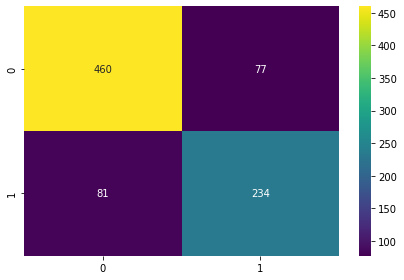

In [103]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
results_decision_tree = EvaluationMetricsModel(y_pred, y_test, "Decision Tree Classifier")

**Random Forest Classifier**

========== Random Forest Classifier ==========

Accuracy on Validation Set: 0.8873

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       555
           1       0.82      0.87      0.84       297

    accuracy                           0.89       852
   macro avg       0.87      0.88      0.88       852
weighted avg       0.89      0.89      0.89       852


Confusion Matrix : 
 [[498  57]
 [ 39 258]]


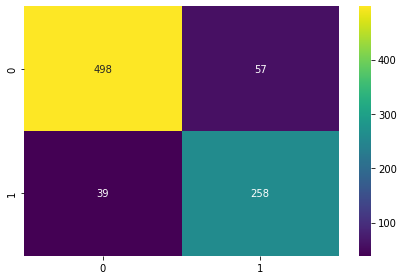

In [104]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)
results_random_forest = EvaluationMetricsModel(y_test, y_pred_random_forest, "Random Forest Classifier")

**Cross Validation**

Cross validation on the Random Forest Classifier since it has given a good accuracy

In [105]:
#Define Cross-Validation
cross_validation = KFold(n_splits = 10, random_state = 1, shuffle = True)

#Creating multiple linear regression model
model = RandomForestClassifier()

#Use K-Fold Cross Validation for evaluating model
scores = cross_val_score(model, X, y, cv = cross_validation, n_jobs = -1)

#Mean absolute error
mean(scores)

0.9073643410852714

**Part 2**

**Models:**  
   1. Decision Tree 
   2. Logistic Regression  
   3. Random Forest.




**1.Decision Tree Classifier**

========== Decision Tree Classifier ==========

Accuracy on Validation Set: 0.8251

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       537
           1       0.77      0.75      0.76       315

    accuracy                           0.83       852
   macro avg       0.81      0.81      0.81       852
weighted avg       0.82      0.83      0.82       852


Confusion Matrix : 
 [[467  70]
 [ 79 236]]


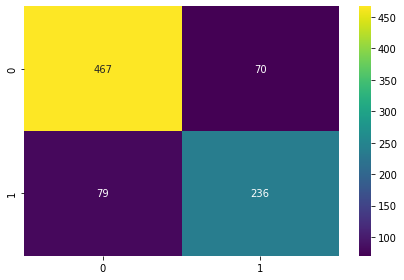

In [106]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)
y_pred = decision_tree_classifier.predict(X_test)
results_decision_tree_classifier = EvaluationMetricsModel(y_pred, y_test, "Decision Tree Classifier")

**2. Logistic regression**

========== Logistic Regression ==========

Accuracy on Validation Set: 0.8134

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       538
           1       0.75      0.75      0.75       314

    accuracy                           0.81       852
   macro avg       0.80      0.80      0.80       852
weighted avg       0.81      0.81      0.81       852


Confusion Matrix : 
 [[458  80]
 [ 79 235]]


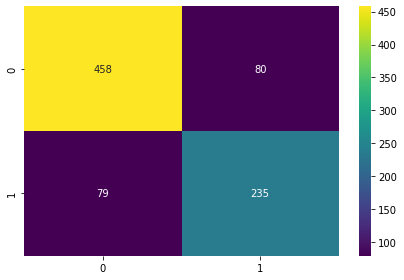

In [107]:

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred_logistic_regression = logistic_regression.predict(X_test)
results_logistic_regression = EvaluationMetricsModel(y_test, y_pred_logistic_regression, "Logistic Regression")

**3. Random Forest**

========== Random Forest Classifier ==========

Accuracy on Validation Set: 0.8862

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.89      0.91       560
           1       0.81      0.87      0.84       292

    accuracy                           0.89       852
   macro avg       0.87      0.88      0.88       852
weighted avg       0.89      0.89      0.89       852


Confusion Matrix : 
 [[500  60]
 [ 37 255]]


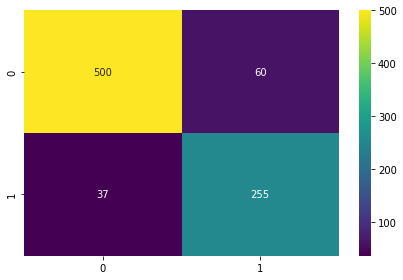

In [108]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, y_train)
y_pred_random_forest_classifier = random_forest_classifier.predict(X_test)
results_random_forest_classifier = EvaluationMetricsModel(y_test, y_pred_random_forest_classifier, "Random Forest Classifier")

In [109]:
#Accuracy of the Models
accuracy = [['RFC',0.8779],['DTC',0.8298],['LR',0.8134]]
scores = pd.DataFrame(accuracy, columns = ['model', 'accuracy'])

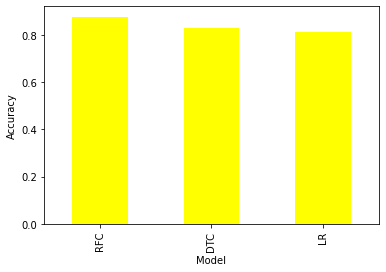

In [110]:
#Plotting Accuracy
scores.set_index('model').accuracy.plot(kind = 'bar', color = 'yellow')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

From the above graph, we can conclude that the best accuracy is obatined from the Random Forest Classifier i.e around **88%**.

**Comparing the sklearn Decision Tree with my Decision Tree from Project 1**

**sklearn Decision Tree Implementation:**

========== Decision Tree Classifier ==========

Accuracy on Validation Set: 0.8380

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       537
           1       0.78      0.78      0.78       315

    accuracy                           0.84       852
   macro avg       0.83      0.83      0.83       852
weighted avg       0.84      0.84      0.84       852


Confusion Matrix : 
 [[469  68]
 [ 70 245]]


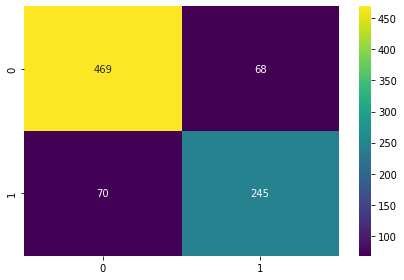

In [111]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)
y_pred = decision_tree_classifier.predict(X_test)
results_decision_tree_classifier = EvaluationMetricsModel(y_pred, y_test, "Decision Tree Classifier")

**My Decision Tree from Project 1**

In [112]:
my_decision_tree_model = DecisionTreeModel(max_depth = 10)
X_train = np.array(X_train)
y_train = np.array(y_train)
my_decision_tree_model.fit(X_train, y_train)

In [113]:
predictions = my_decision_tree_model.predict(np.array(X_test))
print(accuracy_score(y_test, predictions))

0.8192488262910798


Accuracy from the sklearn deciosin tree model is around **82%**

Accuracy from my decision tree model is around **81.5%**

**Ensemble Model: Gradient-Boosting Classifier**

========== Gradient-Boosting Classifier ==========

Accuracy on Validation Set: 0.8568

Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       563
           1       0.77      0.83      0.80       289

    accuracy                           0.86       852
   macro avg       0.84      0.85      0.84       852
weighted avg       0.86      0.86      0.86       852


Confusion Matrix : 
 [[489  74]
 [ 48 241]]


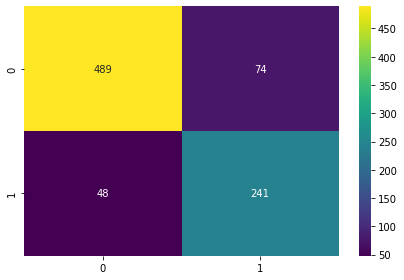

In [114]:
gradient_boosting_classifier = GradientBoostingClassifier()
gradient_boosting_classifier.fit(X_train, y_train)
y_pred_gradient_boosting_classifier = gradient_boosting_classifier.predict(X_test)
results_gradient_boosting_classifier = EvaluationMetricsModel(y_test, y_pred_gradient_boosting_classifier, "Gradient-Boosting Classifier")

**Best Model:**

***From all the models above, the Random Forest Classifier is the best model since it gives a high and a better accuracy compared to all other models***

*Answer the following questions based on what you observe from your model building process:*

* For the best fitted model, does it work better for the Red wine or White wine or similar

Answer: ***Similar***

* Can ensemble methods improve your models?

Answer: ***No, the ensemble methods does not improve our models since it has provided a better result.***

* Whether the categorical variable pH Value is important or not. If it is important, and you need to make a prediction for one instance where the pH value is missing, how would you proceed?

Answer: ***Categorical variable pH value is important. If there is a missing value, I will fill it with an unknown or a new label. I can also use mode imputation to fill the missing value.***